# Определение возраста покупателей

**Описание проекта**

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

Импортируем библиотеки

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Создаем датафрейм

In [2]:
df = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Смотрим на размер выборки

In [5]:
df.shape

(7591, 2)

С помощью гистограммы построим график распределения возраста в выборке

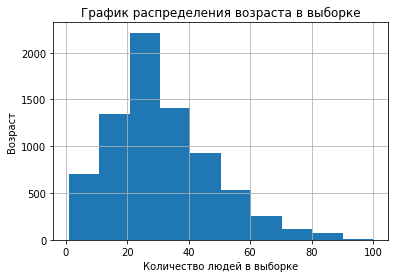

In [6]:
df['real_age'].hist();
plt.title('График распределения возраста в выборке');
plt.xlabel('Количество людей в выборке');
plt.ylabel('Возраст');

In [7]:
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)

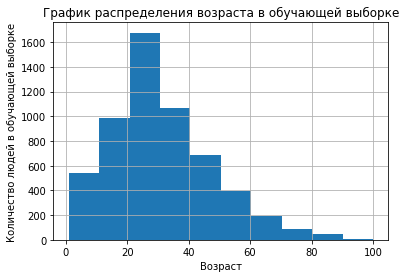

In [8]:
df_train['real_age'].hist();
plt.title('График распределения возраста в обучающей выборке');
plt.xlabel('Возраст');
plt.ylabel('Количество людей в обучающей выборке');

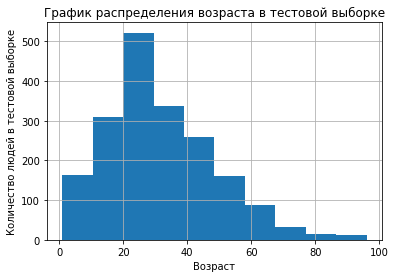

In [9]:
df_valid['real_age'].hist();
plt.title('График распределения возраста в тестовой выборке');
plt.xlabel('Возраст');
plt.ylabel('Количество людей в тестовой выборке');

С помощью ImageDataGenerator создадим загрузчики изображений для обучающей и валидационной выборок.

In [10]:
path = '/datasets/faces/'

In [11]:
train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

In [12]:
def load_train_datagen(path):
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        class_mode='raw',
        target_size=(224, 224),
        batch_size=20,
        subset='training',
        seed=12345)
    return train_datagen_flow

In [13]:
train_datagen_flow = load_train_datagen(path);

Found 5694 validated image filenames.


In [14]:
def load_test_datagen(path):
    val_datagen_flow = val_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'), 
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        class_mode='raw',
        target_size=(224, 224),
        batch_size=20,
        subset='validation',
        seed=12345)
    return val_datagen_flow

In [15]:
val_datagen_flow = load_test_datagen(path);

Found 1897 validated image filenames.


In [16]:
features_train, target_train = next(train_datagen_flow)
features_test, target_test = next(val_datagen_flow)

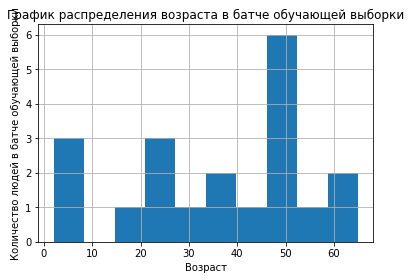

In [17]:
pd.Series(target_train).hist();
plt.title('График распределения возраста в батче обучающей выборки');
plt.xlabel('Возраст');
plt.ylabel('Количество людей в батче обучающей выборки');

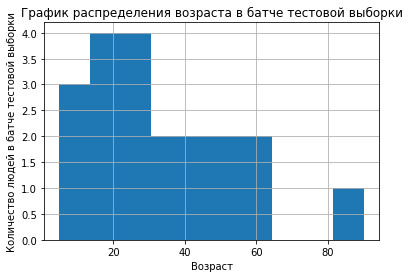

In [18]:
pd.Series(target_test).hist();
plt.title('График распределения возраста в батче тестовой выборки');
plt.xlabel('Возраст');
plt.ylabel('Количество людей в батче тестовой выборки');

Напечатаем 15 фотографий из обучающей выборки. 

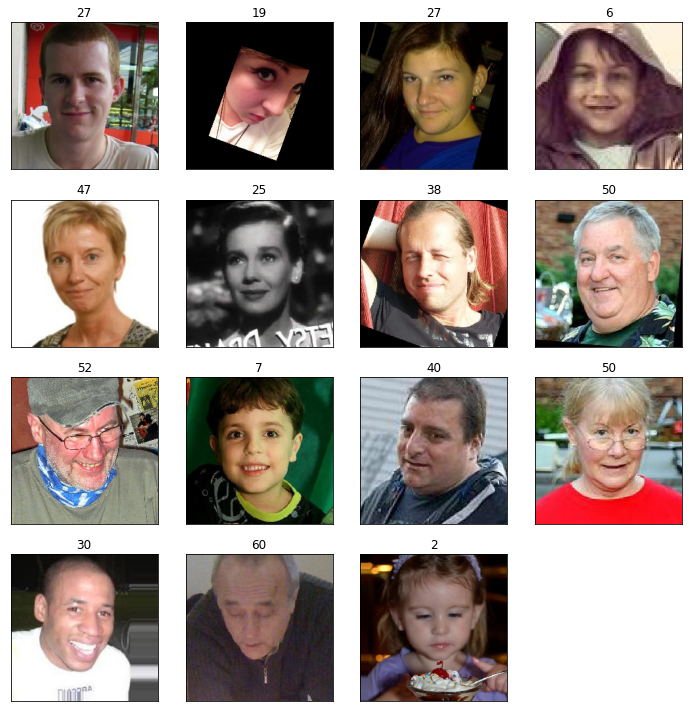

In [19]:
fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features_train[i])
    plt.title(target_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Посмотрим на размерности батча обучающей выборки.

In [21]:
features_train.shape, target_train.shape

((20, 224, 224, 3), (20,))

In [22]:
features_train[0]

array([[[0.8470589 , 0.85098046, 0.8313726 ],
        [0.8470589 , 0.85098046, 0.8313726 ],
        [0.8470589 , 0.85098046, 0.8313726 ],
        ...,
        [0.1764706 , 0.15686275, 0.07843138],
        [0.20784315, 0.18823531, 0.10980393],
        [0.2392157 , 0.21960786, 0.14117648]],

       [[0.8470589 , 0.85098046, 0.8313726 ],
        [0.8470589 , 0.85098046, 0.8313726 ],
        [0.8470589 , 0.85098046, 0.8313726 ],
        ...,
        [0.21568629, 0.19215688, 0.12941177],
        [0.21568629, 0.19215688, 0.12941177],
        [0.21176472, 0.18823531, 0.1254902 ]],

       [[0.8470589 , 0.85098046, 0.8313726 ],
        [0.8470589 , 0.85098046, 0.8313726 ],
        [0.8470589 , 0.85098046, 0.8313726 ],
        ...,
        [0.21176472, 0.1764706 , 0.14117648],
        [0.20000002, 0.16470589, 0.12941177],
        [0.18823531, 0.15294118, 0.11764707]],

       ...,

       [[0.46274513, 0.45882356, 0.4431373 ],
        [0.4666667 , 0.46274513, 0.44705886],
        [0.47058827, 0

В выборке преобладают изображения людей в возрасте 20-30 лет, поэтому вероятно модель будет распознавать возраст таких людей лучше, а людей в возрасте старше 60 хуже(из-за малого количества таких людей выборке).
На вход нейронной сети будет подаваться изображения c параметрами: 224х224 пикселей и 3 цветовыми каналами.

## Обучение модели

Построим модель на основе архитектуры RusNet50. На обучающей выборке добавим горизонтальный флип (позволит увеличить обучающую выборку в два раза).

```python

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np



def load_train(path):
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255, horizontal_flip=True)
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        class_mode='raw',
        target_size=(224, 224),
        batch_size=20,
        subset='training',
        seed=12345)
    return train_datagen_flow


def load_test(path):
    val_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    val_datagen_flow = val_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files',
        x_col='file_name',
        y_col='real_age',
        class_mode='raw',
        target_size=(224, 224),
        batch_size=20,
        subset='validation',
        seed=12345)
    return val_datagen_flow
    

def create_model(input_shape):
    backbone = ResNet50(
        input_shape=input_shape,
  weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 
        include_top=False)
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    model.compile(loss='mae',
                  optimizer='sgd', metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data, 
              epochs=epochs, batch_size=batch_size,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
    return model

```

Модель была обучена в GPU-тренажёре.

Выведем результаты обучения

```

Train for 285 steps, validate for 95 steps
Epoch 1/10
2024-06-24 07:05:34.428401: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-06-24 07:05:34.762769: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
285/285 - 53s - loss: 11.2265 - mae: 11.2310 - val_loss: 14.4957 - val_mae: 14.4911
Epoch 2/10
285/285 - 45s - loss: 8.8482 - mae: 8.8497 - val_loss: 14.4433 - val_mae: 14.4373
Epoch 3/10
285/285 - 43s - loss: 7.8950 - mae: 7.8980 - val_loss: 10.2086 - val_mae: 10.2007
Epoch 4/10
285/285 - 41s - loss: 7.0702 - mae: 7.0699 - val_loss: 9.2207 - val_mae: 9.2151
Epoch 5/10
285/285 - 41s - loss: 6.4468 - mae: 6.4461 - val_loss: 9.1243 - val_mae: 9.1217
Epoch 6/10
285/285 - 41s - loss: 6.0040 - mae: 6.0021 - val_loss: 8.3367 - val_mae: 8.3315
Epoch 7/10
285/285 - 42s - loss: 5.5686 - mae: 5.5691 - val_loss: 9.1115 - val_mae: 9.1099
Epoch 8/10
285/285 - 42s - loss: 5.2596 - mae: 5.2606 - val_loss: 8.1962 - val_mae: 8.1901
Epoch 9/10
Epoch 10/10
285/285 - 42s - loss: 4.7386 - mae: 4.7383 - val_loss: 7.3898 - val_mae: 7.3883
285/285 - 41s - loss: 4.4675 - mae: 4.4686 - val_loss: 7.0787 - val_mae: 7.0779
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
95/95 - 10s - loss: 7.0787 - mae: 7.0779
Test MAE: 7.0779

```

## Анализ обученной модели

- Сверточная нейронная сеть была посторена на основе архетектуры ResNet50, c удалением последних 2 слоев и заменой последнего слоя на полносвязный слой с одним нейроном. Яркость изображений из обучающей выборки были приведены к диапазону [0, 1]. На обучающей выборке был добавлен горизонтальный флип. Веса модели ResNet50 инициализированные на датасете ImageNet были загружены с сервера. В качестве алгоритма обучения нейронной сети был выбран градиентный спуск (SGD). В качестве функции потерь была выбрана MAE.


- Качество на валидационной выборке улучшается, но модель при этом переобучается всё сильнее. Время обучения десяти эпох ~7,5 мин. Средняя абсолютная ошибка (MAE) при обучении на 10 эпохах равна 6.7172 лет.

- Нельзя точно сказать, поможет ли такое качество модели анализировать покупки и предлагать товары покупателям определенной возрастной группы и контролировать добросовестность кассиров при продаже алкоголя.